# EDA (Exploratory Data Analysis) on Head_Brain

We are going to perform regression analysis on headbrain datasets . The input data is in .csv format with 237 observations. it has total four columns (Description is given below).


1.  Gender : 1 for male and 2 for female
2. Age Range: 1 for ages 20-46  and 2 for over 46
3. HeadSize: headsize in cubic cm
4. Brain Weight: Brain Weight in grams 


Our target vaeriable is "Brain Weight" , which has continuous data so its a regression problem


# Importing the required libraries 

In [1]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

# Loading the Dataset

In [2]:
import pandas as pd
df=pd.read_csv("headbrain.csv")
df.head(5)# printing the first five rows of dataset

,Gender,AgeRange,HeadSize,BrainWeight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [5]:
df.shape #chekcing the dimension of the data

(237, 4)

# Data Prepration

In [10]:
#renaming the columns to bit easier one
df=df.rename(columns={"Gender":"Gender","HeadSize":"Size","BrainWeight":"Weight","AgeRange":"Age"})

In [14]:
df.describe()  #statistical summary

,Gender,Age,Size,Weight
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


In [15]:
df.isnull().sum()

Gender    0
Age       0
Size      0
Weight    0
dtype: int64

1. Here we can see there are no missing values 
2. No much difference observed between the mean and median so outliers are not there , still we will validate this further

In [16]:
df.info() #checking the data types of all the columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Gender  237 non-null    int64
 1   Age     237 non-null    int64
 2   Size    237 non-null    int64
 3   Weight  237 non-null    int64
dtypes: int64(4)
memory usage: 7.5 KB


There are no categorical columns exists in the dataset so encoding is not needed.

# EDA

Univariate Analysis

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

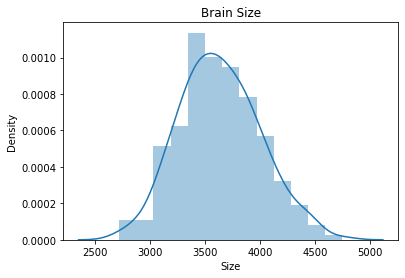

In [18]:
sns.distplot(df['Size'])
plt.title("Brain Size")
plt.show()

It is showing that data is normally distributed in size column

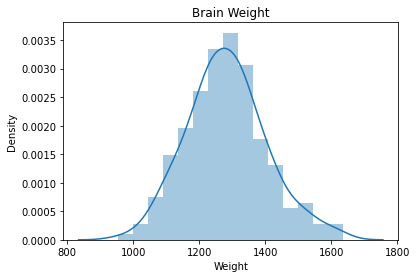

In [19]:
sns.distplot(df['Weight'])
plt.title("Brain Weight")
plt.show()

it is showing that data is normally distributed in the weight column


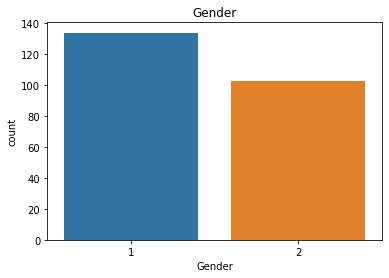

In [20]:
#plotting the gender column
sns.countplot(df['Gender'])
plt.title("Gender")
plt.show()

Data Distribution of gender Column is showing nomal between both the categories

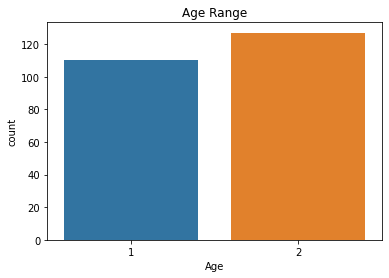

In [22]:
#plotting the Age Column
sns.countplot(df['Age'])
plt.title("Age Range")
plt.show()

Data Distribution of AgeRange Column is showing nomal between both the categories

# Bivariate Analysis

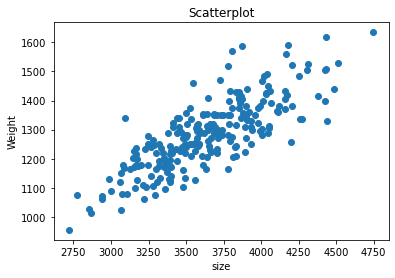

In [23]:
#plotting the scatterplot to check the relation between the brain size and brain weight
plt.scatter(df['Size'],df['Weight'])
plt.title("Scatterplot")
plt.xlabel("size")
plt.ylabel("Weight")
plt.show()

 We can clearly see a linear relationship(positive relation) between size and weight in the above scatter plot

# Multivariate Analysis

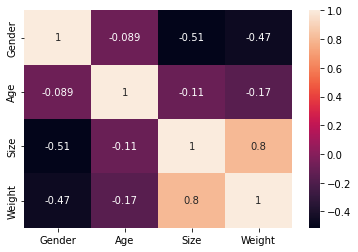

In [26]:
#cheking the corelation using heatmap
corr=df.corr() #funtion provides the corelation value of each column
sns.heatmap(corr,annot=True) #using heatmap we are plotting corelation values obtained by df.corr function
plt.show()

1. Very Low Corelation of Age Range with target variable so we can drop this column
2. Very high and psitive corelation of size  witht the target variable 
3. High negative corelation of the "Gender " column of tragte variable but we will keep as relation is strong

In [28]:
df.drop("Age",axis=1,inplace=True)

# Handling the Outliers 

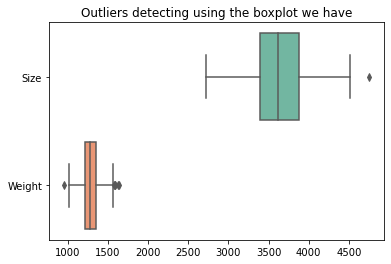

In [32]:
#chekcing outliers using the boxplot
sns.boxplot(data=df[["Size","Weight"]],orient="h",palette="Set2")
plt.title("Outliers detecting using the boxplot we have")
plt.show()

There are outliers which can be removed using different methods, in this project we will use Inter Quartile Range to remove the Outliers 

In [33]:
import scipy
from scipy import stats 
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
df_new=df[(z<3).all(axis=1)]


In [38]:
print("Original Shpae=",df.shape,"\n New","New Shape=",df_new.shape)

Original Shpae= (237, 3) 
 New New Shape= (236, 3)


# Skewness is also an important factor which impacts the distribution of the data .Always try to make dataset less skewed

Chekcing the skewness we have

In [41]:
df_new.skew()

Gender    0.257959
Size      0.164767
Weight    0.205274
dtype: float64

Skewness is in acceptable range (+/- 0.5) so our data is not skewed

# Preparing Dataset for model training

In [44]:
#seperating independent and target variable 
x=df_new.iloc[:,:-1]
x

,Gender,Size
0,1,4512
1,1,3738
2,1,4261
3,1,3777
4,1,4177
...,...,...
232,2,3214
233,2,3394
234,2,3233
235,2,3352


In [48]:
y=df_new.iloc[:,-1].values.reshape(-1,1)
y#target variable

array([[1530],
       [1297],
       [1335],
       [1282],
       [1590],
       [1300],
       [1400],
       [1255],
       [1355],
       [1375],
       [1340],
       [1380],
       [1355],
       [1522],
       [1208],
       [1405],
       [1358],
       [1292],
       [1340],
       [1400],
       [1357],
       [1287],
       [1275],
       [1270],
       [1505],
       [1490],
       [1485],
       [1310],
       [1420],
       [1318],
       [1432],
       [1364],
       [1405],
       [1432],
       [1207],
       [1375],
       [1350],
       [1236],
       [1250],
       [1350],
       [1320],
       [1525],
       [1570],
       [1340],
       [1422],
       [1506],
       [1215],
       [1311],
       [1300],
       [1224],
       [1350],
       [1335],
       [1390],
       [1400],
       [1225],
       [1310],
       [1560],
       [1330],
       [1222],
       [1415],
       [1175],
       [1330],
       [1485],
       [1470],
       [1135],
       [1310],
       [11

# Scailing 

Model can be baised to higher values in datasets so its better to scale the dataset , so that we can bring all the column in column range .There are two algorithms availale for scailing StandardScaler and MinMaxScaler . We are going to use StandardScaler 

In [52]:
#Scailing dataset using StandardScaler
import sklearn
from sklearn.preprocessing import StandardScaler 
sc=StandardScaler()
scaledX=sc.fit_transform(x)


In [64]:
#finding best random state 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_absolute_error,mean_absolute_error
from sklearn.linear_model import LinearRegression


best_rstate=0
accu=0
for i in range(30,200):
    train_x,test_x,train_y,test_y=train_test_split(scaledX,y,test_size=.25,random_state=i)
    mod=LinearRegression()
    mod.fit(train_x,train_y)
    pred_y=mod.predict(test_x)
    tempaccu=r2_score(test_y,pred_y)
    if tempaccu>accu:
        accu=tempaccu
        best_rstate=i

print(f"Best accuracy {accu*100} on the random_state {best_rstate}")

Best accuracy 76.63408645241039 on the random_state 128


We found the best random state 128 and we will be using it for train_test_split in the next step

In [66]:
#creatring train_test_split from the best random_state
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(scaledX,y,test_size=.25,random_state=128)


LinearRegression

In [101]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(train_x,train_y)
y_pred=LR.predict(test_x)
r2score=r2_score(test_y,y_pred)
cvscore=cross_val_score(LinearRegression(),train_x,train_y,cv=5).mean()
print(f"Accuracy={r2score*100} , cross_val_score={cvscore*100} & difference={(r2score*100)-(cvscore*100)}")

Accuracy=76.63408645241039 , cross_val_score=53.552027171772956 & difference=23.08205928063743


RandomForestRegressor

In [102]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor()
RF.fit(train_x,train_y)
pred_y=RF.predict(test_x)
r2score=r2_score(test_y,pred_y)
cvscore=cross_val_score(RandomForestRegressor(),train_x,train_y,cv=5).mean()
print(f"Accuracy={r2score*100} ,cross_val_score={cvscore*100} & difference={(r2score*100)-(cvscore*100)}")


Accuracy=61.04190912744141 ,cross_val_score=36.40427650219748 & difference=24.637632625243924


AdaBoostRegressor

In [104]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()
ada.fit(train_x,train_y)
y_pred=ada.predict(test_x)
r2score=r2_score(test_y,y_pred)
cvscore=cross_val_score(AdaBoostRegressor(),train_x,train_y,cv=5).mean()
print(f"Accuracy={r2score*100} ,cross_val_score={cvscore*100} & difference={(r2score*100)-(cvscore*100)}")

Accuracy=75.63981766103855 ,cross_val_score=44.47026752048286 & difference=31.169550140555693


SGD Regressor

In [105]:
from sklearn.linear_model import SGDRegressor
sgd=SGDRegressor()
sgd.fit(train_x,train_y)
y_pred=sgd.predict(test_x)
r2score=r2_score(test_y,y_pred)
cvscore=cross_val_score(SGDRegressor(),train_x,train_y,cv=5).mean()
print(f"Accuracy={r2score*100} ,cross_val_score={cvscore*100} & difference={(r2score*100)-(cvscore*100)}")

Accuracy=76.63569986502479 ,cross_val_score=53.574141217095416 & difference=23.061558647929374


Linear Rergression and SGDRegressor are the best performing models of almost same accuracy and cross validation score .We can choose either of them our best model so i am moving ahead with SGDRegressor

# Hyperparameter Tuning

It is a technique to find out the best parameter for our model to improve the accuracy

In [108]:
#creating parameter list to pass in GridSearchCV
parameters={"max_iter":[500,700,900,1100,1200,1300,1400,1500],
          "alpha":[0.0001,0.001,0.01,0.1,1,10,100],
           "penalty":["elasticnet","l1","l2"]}

In [109]:
from sklearn.model_selection import GridSearchCV
GCV=GridSearchCV(SGDRegressor(),parameters,cv=5,scoring="r2") #initializing GridSearchCV
GCV.fit(train_x,train_y)
GCV.best_estimator_ #finding best estimators
GCVpred=GCV.best_estimator_.predict(test_x)
print("Final Accuracy",r2_score(test_y,GCVpred)*100)  #final accuracy


Final Accuracy 76.5423065422639


Model accuracy is not increasing after 76.52% it is because of less data . we need to collect the more data to improve the accuracy  further

# Serialization

In [111]:
import joblib
joblib.dump(GCV.best_estimator_,"HeadBrainProject.pkl")

['HeadBrainProject.pkl']